## Import libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load source datasets

In [2]:
train_df = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")
test_df = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
print("train_df: {} \ntest_df: {}".format(train_df.shape, test_df.shape))

train_df: (100000, 52) 
test_df: (50000, 51)


In [3]:
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


## Data Cleansing

In [4]:
test_df.loc[test_df['feature_3']==25,'feature_3']=26
test_df.loc[test_df['feature_4']==36,'feature_4']=37
test_df.loc[test_df['feature_21']==31,'feature_21']=36
test_df.loc[test_df['feature_25']==24,'feature_25']=23
test_df.loc[test_df['feature_34']==26,'feature_34']=25
test_df.loc[test_df['feature_49']==21,'feature_49']=20

test_df.shape

(50000, 50)

In [5]:
train_df = train_df[train_df['feature_5']!=10]

train_df = train_df[train_df['feature_6']!=26]
train_df = train_df[train_df['feature_6']!=27]

train_df = train_df[train_df['feature_7']!=30]
train_df = train_df[train_df['feature_7']!=31]

train_df = train_df[train_df['feature_9']!=17]

train_df = train_df[train_df['feature_10']!=16]

train_df = train_df[train_df['feature_11']!=12]

train_df = train_df[train_df['feature_15']!=20]

train_df = train_df[train_df['feature_16']!=18]

train_df = train_df[train_df['feature_23']!=18]
train_df = train_df[train_df['feature_23']!=19]

train_df = train_df[train_df['feature_27']!=29]

train_df = train_df[train_df['feature_28']!=23]

train_df = train_df[train_df['feature_29']!=13]

train_df = train_df[train_df['feature_33']!=24]

train_df = train_df[train_df['feature_32']!=26]
train_df = train_df[train_df['feature_32']!=27]

train_df = train_df[train_df['feature_35']!=43]
train_df = train_df[train_df['feature_35']!=-2]
train_df = train_df[train_df['feature_35']!=38]
train_df = train_df[train_df['feature_35']!=39]


train_df = train_df[train_df['feature_38']!=65]
train_df = train_df[train_df['feature_38']!=55]
train_df = train_df[train_df['feature_38']!=-8]
train_df = train_df[train_df['feature_38']!=-3]
train_df = train_df[train_df['feature_38']!=-2]
train_df = train_df[train_df['feature_38']!=63]

train_df = train_df[train_df['feature_39']!=65]
train_df = train_df[train_df['feature_39']!=66]
train_df = train_df[train_df['feature_39']!=-5]
train_df = train_df[train_df['feature_39']!=-3]
train_df = train_df[train_df['feature_39']!=-2]
train_df = train_df[train_df['feature_39']!=63]

train_df = train_df[train_df['feature_42']!=37]
train_df = train_df[train_df['feature_42']!=-2]
train_df = train_df[train_df['feature_42']!=-1]

train_df = train_df[train_df['feature_43']!=33]
train_df = train_df[train_df['feature_43']!=31]

train_df.shape

(99918, 51)

## Extract target labels

In [6]:
class_map = {
    'Class_1': 0,
    'Class_2': 1,
    'Class_3': 2,
    'Class_4': 3
}

train_df['target'] = train_df['target'].map(class_map)
train_df.groupby(['target']).size().reset_index().rename(columns={0:'Count'})

,target,Count
0,0,8481
1,1,57446
2,2,21408
3,3,12583


In [7]:
train_y = train_df['target'].values
train_df.drop(['target'], inplace=True, axis=1)
print("train_y: {}".format(train_y.shape))

train_y: (99918,)


In [8]:
base_features = train_df.columns.to_list()
base_features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49']

## PCA features

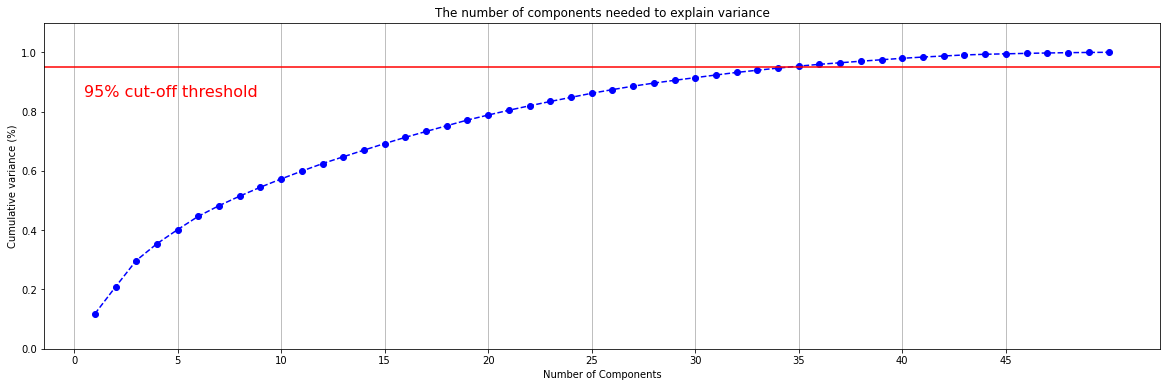

In [9]:
# Deciding n_components for PCA
data = pd.concat([train_df[base_features], test_df[base_features]], axis=0)
pca = PCA().fit(data)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 51, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 50, step=5))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [10]:
def pca_fet(train, test, features, n_components, SEED=10):
    train_ = train[features].copy()
    test_ = test[features].copy()
    data = pd.concat([train_, test_], axis=0)
    index = data.index

    pca = PCA(n_components=n_components, random_state=SEED)
    data = pca.fit_transform(data)
    columns = [f'pca_{i + 1}' for i in range(n_components)]
    data = pd.DataFrame(data, columns=columns, index=index)
    
    train_ = data.iloc[:train.shape[0]]
    test_ = data.iloc[train.shape[0]:]
    train = pd.concat([train, train_], axis=1)
    test = pd.concat([test, test_], axis=1)
    return train, test

In [11]:
train_df, test_df = pca_fet(train_df, test_df, base_features, n_components=35)
print("train_df: {} \ntest_df: {}".format(train_df.shape, test_df.shape))

train_df: (99918, 85) 
test_df: (50000, 85)


## KMeans Features

In [12]:
def kmeans_fet(train, test, features, n_clusters, SEED=10):
    train_ = train[features].copy()
    test_ = test[features].copy()
    data = pd.concat([train_, test_], axis=0)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED).fit(data)
    
    train[f'clusters_'] = kmeans.labels_[:train.shape[0]]
    test[f'clusters_'] = kmeans.labels_[train.shape[0]:]
    train = pd.get_dummies(train, columns = [f'clusters_'])
    test = pd.get_dummies(test, columns = [f'clusters_'])
    return train, test

In [13]:
train_df, test_df = kmeans_fet(train_df, test_df, base_features, n_clusters=15)
print("train_df: {} \ntest_df: {}".format(train_df.shape, test_df.shape))

train_df: (99918, 100) 
test_df: (50000, 100)


In [14]:
train_df['target'] = train_y.ravel()
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,clusters__6,clusters__7,clusters__8,clusters__9,clusters__10,clusters__11,clusters__12,clusters__13,clusters__14,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Save the processed datasets

In [15]:
data_dict = {}
data_dict['train_df'] = train_df
data_dict['test_df'] = test_df

file = open("./TPS_May_Dataset.txt", 'wb')
pickle.dump(data_dict, file)
file.close()